In [7]:
import pandas as pd
sales = pd.read_csv('sales.csv')

In [49]:
# Answering some question using data presented in the data file using sql and python 

In [55]:
#1) Which branch has the highest and lowest sales? 
# and represent the on bar graph , also show the market share for 
# each location using pie chart 
sales.groupby('Location').sum()['Total']

Location
Brookfield     72141
Park lane      70432
Water tower    65215
Name: Total, dtype: int64

In [63]:
# now we plot the sales on bar graph 
location_list = sales.groupby('Location')
location = [x for x,y in location_list]
location

['Brookfield', 'Park lane', 'Water tower']

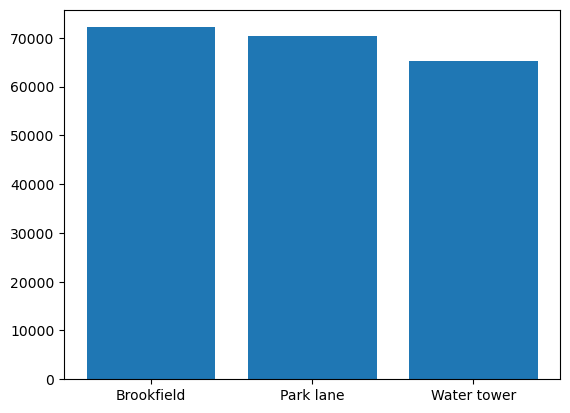

In [65]:
# importing matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
plt.bar(location,sales.groupby('Location').sum()['Total'])
plt.show()

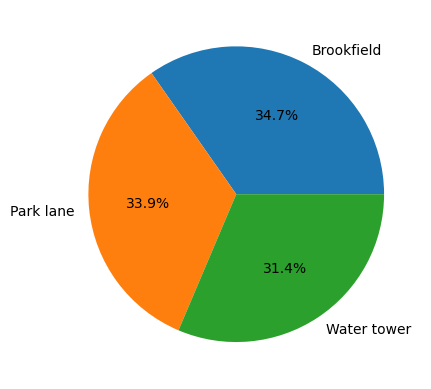

In [71]:
# ploting the market share on the pie chart 
plt.pie(sales.groupby('Location').sum()['Total'], labels=location, autopct='%1.1f%%')
plt.show()

In [73]:
#2) which location has more female customers and which location has more  male 


In [91]:
location_sales = sales.groupby(['Location','Gender']).count()['Invoice ID']

In [93]:
unstacked_sales = location_sales.unstack(level=0)

<Axes: xlabel='Gender'>

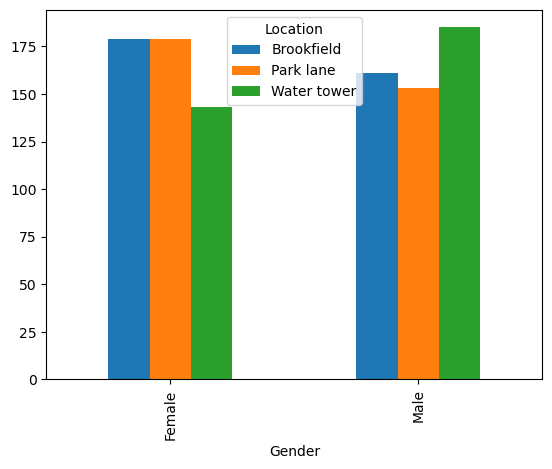

In [95]:
unstacked_sales.plot(kind= 'bar')

In [98]:
#3) 
#3.1) Which branch has more members vs which has less members ?
#3.2) which branch has highest rating and which has lowest?


<Axes: xlabel='Location'>

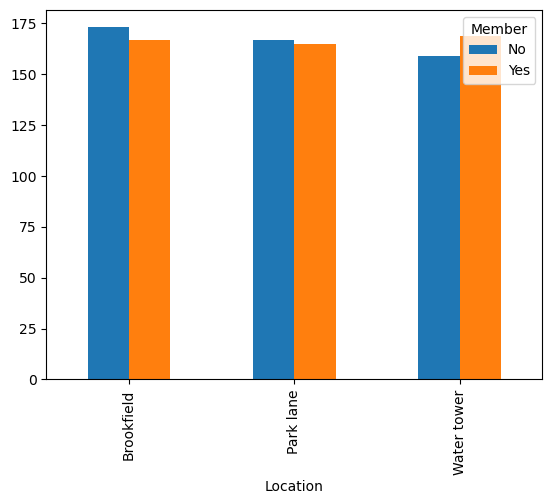

In [100]:
# 3.1
members = location_sales = sales.groupby(['Member','Location']).count()['Invoice ID']
members.unstack(level=0).plot(kind='bar')

In [110]:
#3.2
rating = sales.groupby('Location')['Rating'].mean()

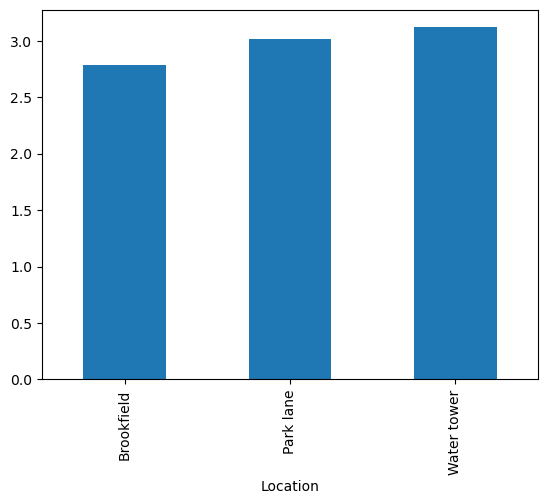

In [116]:
rating.plot(kind='bar')
plt.show()


In [118]:
#4) 
#4.1) Which city has more females shopping?
#4.2) Who spends more men or women?
#4.3) Which type of customer spends more member or non-member?
#4.4) Which product line sells more?
#4.5) Which product line is popular among men vs women


In [122]:
#4.1)
female_shoppers = sales.groupby(['City','Gender']).count()['Invoice ID']

<Axes: xlabel='Gender'>

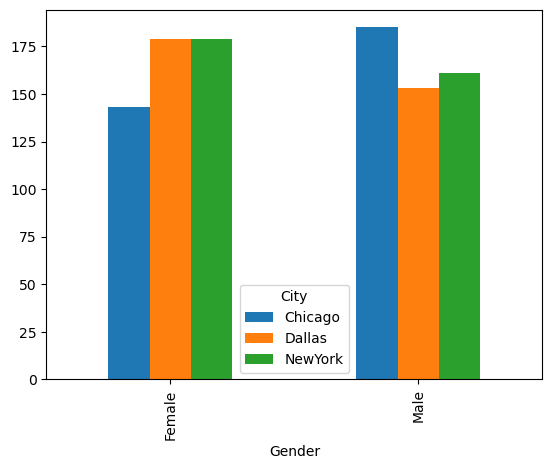

In [124]:
female_shoppers.unstack(level=0).plot(kind='bar')

In [1]:
#4.2)

In [9]:
sales.head(10)


,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4
5,263634050,3/9/2018,17:55,Male,Brookfield,NewYork,Yes,Clothing,52,4,208,Gpay,3
6,99646662,3/4/2018,13:21,Male,Water tower,Chicago,No,Clothing,81,3,243,Cash,4
7,188869875,3/8/2018,13:24,Male,Park lane,Dallas,No,Books,80,2,160,Cash,3
8,325637547,1/18/2018,15:33,Male,Park lane,Dallas,Yes,Clothing,91,3,273,Card,3
9,562942936,2/24/2018,16:05,Female,Park lane,Dallas,No,Books,80,2,160,Cash,4


In [21]:
spend = sales.groupby('Gender').sum()['Total']

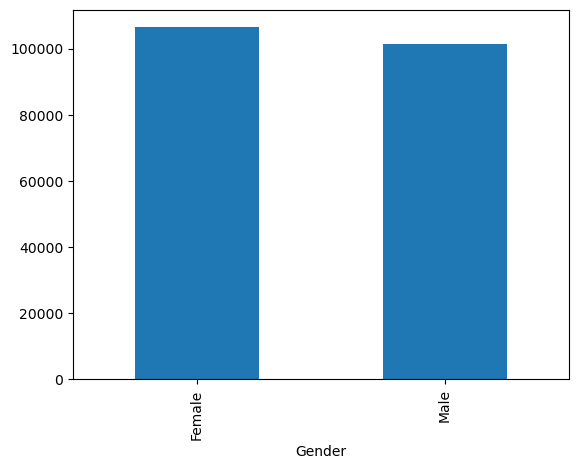

In [41]:
spend.plot(kind='bar')
plt.show()

In [27]:
#4.3)


In [33]:
Member = sales.groupby('Member').sum()['Total']
Member

Member
No     100245
Yes    107543
Name: Total, dtype: int64

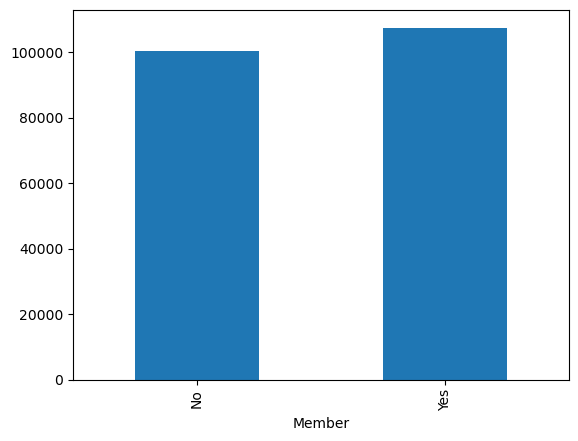

In [39]:
import matplotlib.pyplot as plt
Member.plot(kind= 'bar')
plt.show()


In [43]:
#4.4)


In [47]:
category_sales = sales.groupby('Category').count()['Rating']

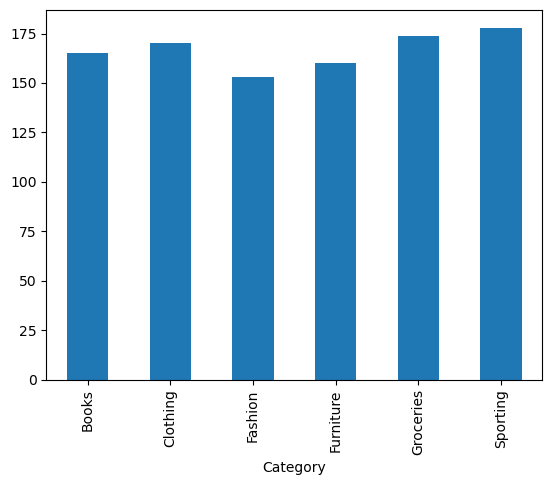

In [49]:
category_sales.plot(kind='bar')
plt.show()

In [53]:
#4.5)

In [57]:
sales_m_w = sales.groupby(['Gender','Category']).count()['Rating']

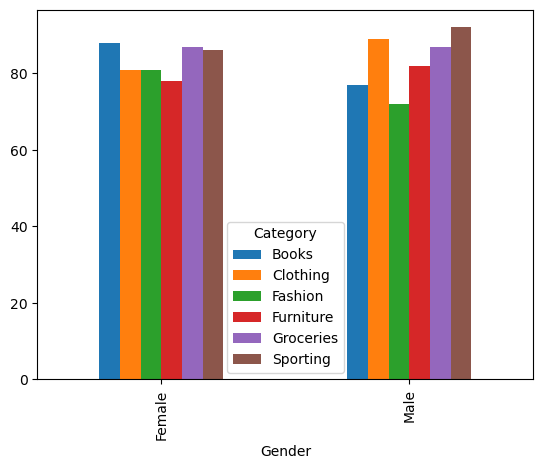

In [69]:
sales_m_w.unstack(level=1).plot(kind='bar')
plt.show()

In [98]:
#5) 
#5.1) what days of the month make most the sales

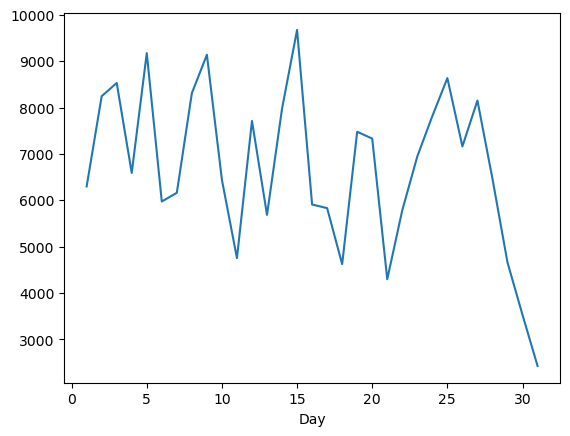

In [100]:
sales['Day']= pd.to_datetime(sales['Date']).dt.day
day_sales= sales.groupby('Day').sum()['Total']
day_sales.plot()
plt.show()


In [ ]:
#5.2)  what  month make most the sales

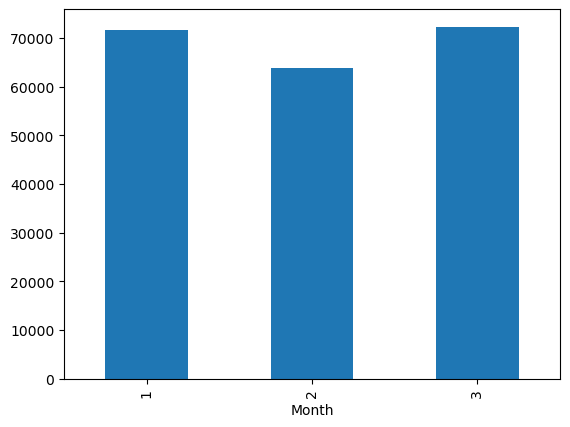

In [104]:
sales['Month']= pd.to_datetime(sales['Date']).dt.month
Month_sales= sales.groupby('Month').sum()['Total']
Month_sales.plot(kind = 'bar')
plt.show()

In [106]:
#5.3)  what  hours  make most the sales

C:\Users\concierge\AppData\Local\Temp\ipykernel_41332\1915907317.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Hour']= pd.to_datetime(sales['Time']).dt.hour


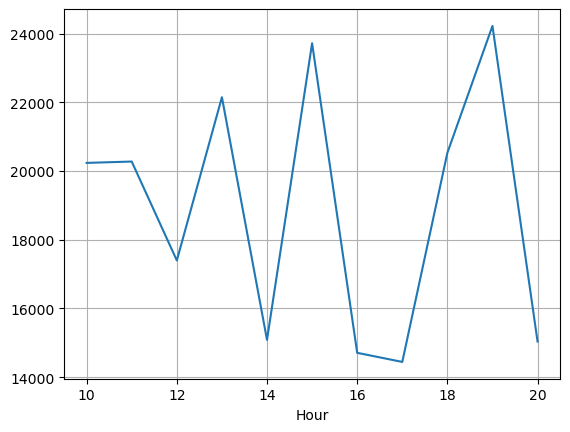

In [116]:
sales['Hour']= pd.to_datetime(sales['Time']).dt.hour
Hour_sales= sales.groupby('Hour').sum()['Total']
Hour_sales.plot(grid = True)
plt.show()

In [118]:
#5.4) what time people make more epayments and cash payment ?

<Axes: xlabel='Hour'>

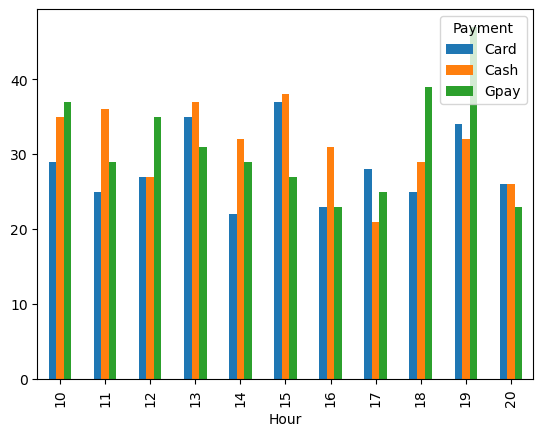

In [126]:
sales.groupby(['Payment', 'Hour']).count()['Invoice ID'].unstack(level=0).plot(kind= 'bar')